### Importing necessary libraries

In [620]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

### Loading the data

In [621]:
df = pd.read_csv('Customer_Churn_Dataset.csv')

Exploratory Data Analysis

In [622]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [623]:
df.shape

(7043, 23)

In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Initially, let's convert the totalcharges column to a numeric column as it has currently been saved as an object

In [625]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [626]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.515689,0.419566
std,0.368612,24.559481,30.090047,2266.771362,1.275299,1.250117
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,0.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000


A lot of information can be inferred from this. It can be seen that the mean for the senior citizen variable is 0.16 showing that only around 16% of the total customers belong to that age range. It can also be seen that the monthly charges are between 18 and 118 suggesting not a huge range or discrepancy between minimum and maximum.

In [627]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

In [628]:
df = df.dropna()

In [629]:
df.duplicated().sum()

np.int64(0)

In [630]:
df = df.drop(columns =['customerID'],axis=1)

In [631]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Visualisations

In [632]:
num_cols = df.select_dtypes(include=['int64','float64'])
num_cols.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
0,0,1,29.85,29.85,0,0
1,0,34,56.95,1889.50,0,0
2,0,2,53.85,108.15,0,0
3,0,45,42.30,1840.75,0,3
4,0,2,70.70,151.65,0,0


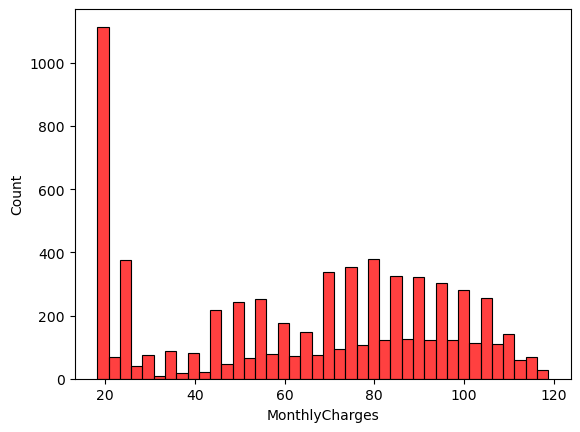

In [633]:
sns.histplot(num_cols['MonthlyCharges'],bins=40,color='red')
plt.show()

Most monthly charges tend to be around 20 while there are some small spikes where larger charges to the customers are present as well. 

#### Checking for outliers

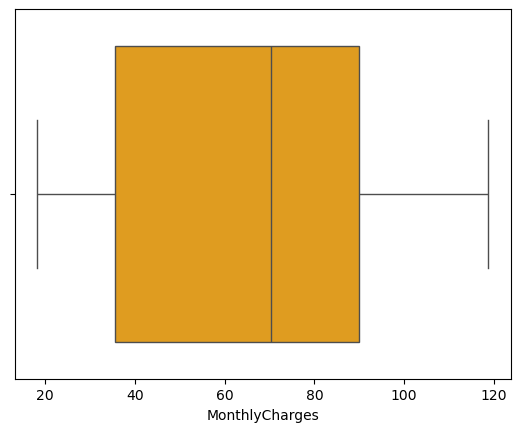

In [634]:
sns.boxplot(x=num_cols['MonthlyCharges'],color='orange')
plt.show()

As expected, there are no customers that are charged an amount enough to be deemed as an outlier. 

In [635]:
q1 = num_cols['MonthlyCharges'].quantile(0.25)
q3 = num_cols['MonthlyCharges'].quantile(0.75)
IQR = q3-q1
lower = q1 - 1.5 * IQR
upper = q3 - 1.5 * IQR
print(q1, q3, lower, upper)
print(df['MonthlyCharges'].min(), df['MonthlyCharges'].max())
outliers = num_cols[(num_cols['MonthlyCharges'] < lower) | (num_cols['MonthlyCharges'] > upper)]


35.5875 89.8625 -45.824999999999996 8.450000000000003
18.25 118.75


No outliers

Preprocessing 

In [636]:
cat_cols = df.select_dtypes(include = ['object'])
for col in cat_cols.columns:
    a = cat_cols[col].value_counts()
    print(col,': \n',a,'\n')

gender : 
 gender
Male      3549
Female    3483
Name: count, dtype: int64 

Partner : 
 Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Dependents : 
 Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

PhoneService : 
 PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

MultipleLines : 
 MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

InternetService : 
 InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

OnlineSecurity : 
 OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 

OnlineBackup : 
 OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64 

DeviceProtection : 
 DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int

In [637]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [638]:
cat_cols_one_hot = x.select_dtypes(include='object').columns.tolist()
cat_cols_one_hot.remove('Contract')
cat_cols_label = ['Contract']

In [639]:
num_col = x.select_dtypes(include = ['float64', 'int64']).columns.tolist()

K-fold cross validation with k = 5 will be used in order to perform cross-validation on the model to ensure it's consistency.

In [640]:
kf = KFold(n_splits=5, shuffle=True,random_state=42)
score = []

In [641]:
for train_idx, val_idx in kf.split(x):

    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]


Both label encoder and One Hot encoder will be used on the dataset to convert the categorical columns into numerical ones. This decision is based on a willful choice to only use the Label Encoder on the contract column as it has ordinal labels and One Hot encoder on the rest of the variables. 

In [642]:
label_encoder = LabelEncoder()
x_train_contract = label_encoder.fit_transform(x_train['Contract'])
x_val_contract = label_encoder.transform(x_val['Contract'])

In [643]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
x_train_cat = one_hot_encoder.fit_transform(x_train[cat_cols_one_hot])
x_val_cat = one_hot_encoder.transform(x_val[cat_cols_one_hot])

In [644]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SeniorCitizen    7032 non-null   int64  
 1   tenure           7032 non-null   int64  
 2   MonthlyCharges   7032 non-null   float64
 3   TotalCharges     7032 non-null   float64
 4   numAdminTickets  7032 non-null   int64  
 5   numTechTickets   7032 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 384.6 KB


In [645]:
scaler = StandardScaler()
x_train_num = scaler.fit_transform(x_train[num_col])
x_val_num = scaler.transform(x_val[num_col])

In [646]:
x_train_cat = x_train_cat.toarray()
x_val_cat = x_val_cat.toarray()

In [647]:
x_val_contract = x_val_contract.reshape(-1,1)
x_train_contract = x_train_contract.reshape(-1,1)

In [648]:
X_train = np.hstack([x_train_num,x_train_cat,x_train_contract])

X_val = np.hstack([x_val_num,x_val_contract,x_val_cat])

In [649]:
print(type(x_val_num), x_val_num.shape)
print(type(x_val_cat), x_val_cat.shape)
print(type(x_val_contract), x_val_contract.shape)


<class 'numpy.ndarray'> (1406, 6)
<class 'numpy.ndarray'> (1406, 38)
<class 'numpy.ndarray'> (1406, 1)


Modelling

In [650]:
from sklearn.metrics import recall_score, precision_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [651]:
y_train.replace(('Yes','No'),(1,0),inplace=True)

C:\Users\cathy\AppData\Local\Temp\ipykernel_13344\299262512.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.replace(('Yes','No'),(1,0),inplace=True)


In [652]:
y_val.replace(('Yes','No'),(1,0),inplace=True)

C:\Users\cathy\AppData\Local\Temp\ipykernel_13344\602283363.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_val.replace(('Yes','No'),(1,0),inplace=True)


In [668]:
rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced',min_samples_split=3)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_val)
precision = precision_score(y_pred,y_val)
recall = recall_score(y_pred,y_val)
accuracy = accuracy_score(y_pred,y_val)
print('Precision :',precision,'Recall :',recall,'accuracy :',accuracy)
print(confusion_matrix(y_pred,y_val))

Precision : 0.002564102564102564 Recall : 0.2 accuracy : 0.7204836415362731
[[1012  389]
 [   4    1]]


In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)
y_pred = lg_model.predict(X_val)
precision = precision_score(y_pred,y_val)
recall = recall_score(y_pred,y_val)
accuracy = accuracy_score(y_pred,y_val)
print('Precision :',precision,'Recall :',recall,'accuracy :',accuracy)
print(confusion_matrix(y_pred,y_val))

Precision : 0.28717948717948716 Recall : 0.7619047619047619 accuracy : 0.7773826458036984
[[981 278]
 [ 35 112]]
